In [6]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

In [7]:
import tensorflow as tf
from tensorflow import keras

# Location directory

In [8]:
train_dir = r'C:\Users\Suresh\cats_and_dogs_small\train'
validation_dir = r'C:\Users\Suresh\cats_and_dogs_small\validation'
test_dir = r'C:\Users\Suresh\cats_and_dogs_small\test'

# Data Preprocessing

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
train_dir,
target_size = (150, 150),
batch_size = 20,
class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(
validation_dir,
target_size = (150, 150),
batch_size = 20,
class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# Creating model architecture

In [6]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [7]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation = "relu", input_shape = (150, 150, 3),))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation = "relu"))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation = "relu"))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation = "relu"))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation = "relu"))
model.add(layers.Dense(1, activation = "sigmoid"))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

# Compiling the model

In [9]:
from tensorflow.keras import optimizers

model.compile(loss = "binary_crossentropy",
             optimizer = optimizers.RMSprop(lr = 1e-4),
             metrics = ["acc"])

# Training the model

In [10]:
model_history = model.fit_generator(train_generator, steps_per_epoch = 100, epochs = 5,
                                  validation_data = validation_generator, validation_steps = 50)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
100/100 [==============================] - 56s 558ms/step - loss: 0.6920 - acc: 0.5120 - val_loss: 0.6790 - val_acc: 0.6040
Epoch 2/20
100/100 [==============================] - 64s 636ms/step - loss: 0.6619 - acc: 0.6155 - val_loss: 0.6510 - val_acc: 0.6200
Epoch 3/20
100/100 [==============================] - 63s 632ms/step - loss: 0.6191 - acc: 0.6710 - val_loss: 0.6276 - val_acc: 0.6470
Epoch 4/20
100/100 [==============================] - 59s 590ms/step - loss: 0.5773 - acc: 0.6920 - val_loss: 0.6358 - val_acc: 0.6330
Epoch 5/20
100/100 [==============================] - 57s 574ms/step - loss: 0.5473 - acc: 0.7260 - val_loss: 0.5841 - val_acc: 0.6910
Epoch 6/20
100/100 [==============================] - 63s 625ms/step - loss: 0.5149 - acc: 0.7465 - val_loss: 0.5967 - val_acc: 0.6870
Epoch 7/20
100/100 [==============================] - 64s 642ms/step - loss: 0.4899 - acc: 0.7595 - val_loss: 0.57

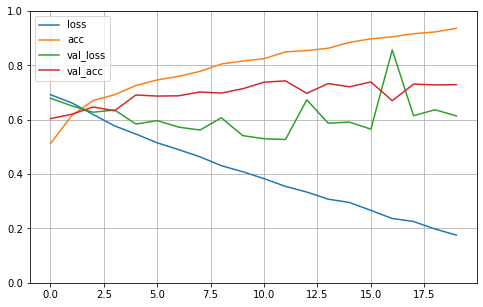

In [11]:
pd.DataFrame(model_history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [12]:
model.save("model.h5")

In [14]:
from tensorflow.keras import backend as k

k.clear_session()
del model

# Data Augmentation
## Image preprocessing

In [25]:
train_datagen = ImageDataGenerator(
rescale = 1./255,
rotation_range = 40,
width_shift_range = 0.2,
height_shift_range = 0.2,
shear_range = 0.2,
zoom_range = 0.2,
horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
train_dir,
target_size = (150, 150),
batch_size = 32,
class_mode = "binary")

validation_generator = test_datagen.flow_from_directory(
validation_dir,
target_size = (150, 150),
batch_size = 32,
class_mode = "binary")


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# Creating model architecture

In [27]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation = "relu", input_shape = (150, 150, 3),))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation = "relu"))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation = "relu"))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation = "relu"))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation = "relu"))
model.add(layers.Dense(1, activation = "sigmoid"))

# Compiling the model

In [28]:
model.compile(loss = "binary_crossentropy",
             optimizer = optimizers.RMSprop(lr = 1e-4),
             metrics = ["acc"])

# Model Training

In [32]:
model_history = model.fit_generator(train_generator, steps_per_epoch = 100, epochs = 100,
                                  validation_data = validation_generator, validation_steps = 50)

Epoch 1/100
 63/100 [=================>............] - 57s 902ms/step - loss: 0.6909 - acc: 0.5135 - val_loss: 0.6864 - val_acc: 0.5380


In [34]:
model.save("snn_projecy_dogvscat.h5")

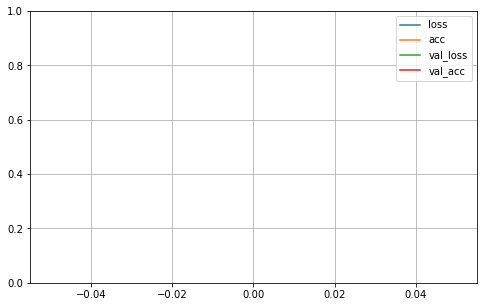

In [35]:
pd.DataFrame(model_history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()